# 분류 평가 지표

## MNIST Dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

### 데이터 가져오기

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

### 데이터 탐색하기

In [3]:
type(mnist) # bunch type

sklearn.utils.Bunch

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X = mnist['data']
y = mnist['target']

In [6]:
X.shape  # 70000개의 샘플에 대해서 784개의 특성

(70000, 784)

In [7]:
y.shape  # 70000개의 정답

(70000,)

In [9]:
X[0].shape  # 0번째 샘플의 데이터 크기

(784,)

In [10]:
28 * 28

784

In [17]:
some_digit = X[0]
print(some_digit.shape)
some_digit_img = some_digit.reshape(28, 28)
print(some_digit_img.shape)

(784,)
(28, 28)


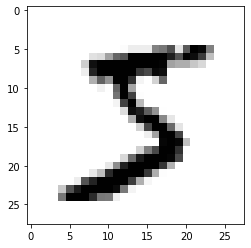

In [18]:
plt.imshow(some_digit_img, cmap='binary')

- 정답값 확인

In [19]:
y[0]  # 현재 타입이 문자열

'5'

In [21]:
y = y.astype(np.uint8)
y[0]

5

### 데이터 준비 (훈련데이터, 테스트데이터)

In [22]:
# 70000만개의 데이터가 이미 뒤섞여 있으므로 
# 앞에서 60000개의 데이터를 훈련데이터로 사용
# 뒤의 10000개의 데이터를 테스트데이터로 사용

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [31]:
for i in range(10):
    print('label의 분표:', i, '-', (y_train == i).sum())

label의 분표: 0 - 5923
label의 분표: 1 - 6742
label의 분표: 2 - 5958
label의 분표: 3 - 6131
label의 분표: 4 - 5842
label의 분표: 5 - 5421
label의 분표: 6 - 5918
label의 분표: 7 - 6265
label의 분표: 8 - 5851
label의 분표: 9 - 5949


### 이진분류

In [35]:
(y_train == 5).sum()  # 10% (5인 데이터)

5421

In [36]:
60000 - (y_train == 5).sum()  # 90% (5가 아닌 데이터)

54579

In [37]:
y_train_5 = (y_train == 5).astype(np.uint8)   # 5인지 아닌지를 분류: 5이면 1, 5가 아니면 0
y_test_5 = (y_train == 5).astype(np.uint8)

In [38]:
(y_train_5 == 1).sum(), (y_train_5 == 0).sum() 

(5421, 54579)

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train_5)

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, scoring='accuracy', cv=3)

array([0.95035, 0.96035, 0.9604 ])

### 오차행렬

In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [44]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [46]:
y_train_pred.shape

(60000,)

In [47]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [48]:
3530 / (687+3530)  # 정밀도

0.8370879772350012

In [50]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [49]:
3530 / (1891 + 3530)   # 재현율

0.6511713705958311

In [51]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [52]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [53]:
y_train_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [54]:
y_train_scores  # 6만개의 데이터에 대한 확신 점수: 0보다 크면 양성(5 맞음), 0보다 작은 음성(5 아님)

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [55]:
(y_train_scores > 0).sum()

4217

In [56]:
(y_train_pred == 1).sum()

4217

In [57]:
# 임계값 (확신 점수에 대한 임계값을 0에서 8000으로 올리면 '5'에 대한 예측이 정밀해짐)
(y_train_scores > 8000).sum()

1667

In [58]:
threshold = 8000
y_train_pred_th8000 = y_train_scores > threshold

In [59]:
# 임계값을 8000으로 했을 때의 오차 행렬
confusion_matrix(y_train_5, y_train_pred_th8000)

array([[54470,   109],
       [ 3863,  1558]], dtype=int64)

In [ ]:
# 기본 임계값(0)일 때의 오차 행렬
# array([[53892,   687],
#        [ 1891,  3530]]

In [60]:
precision_score(y_train_5, y_train_pred_th8000)

0.9346130773845231

In [61]:
recall_score(y_train_5, y_train_pred_th8000)

0.2874008485519277

In [64]:
from sklearn.metrics import precision_recall_curve

In [65]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)

In [66]:
precisions

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [67]:
recalls

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [68]:
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

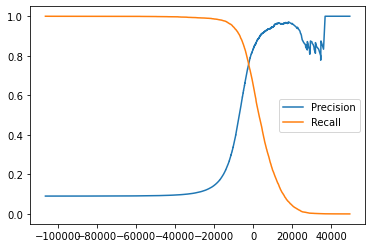

In [69]:
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.legend()

In [70]:
precisions >= 0.9

array([False, False, False, ...,  True,  True,  True])

In [71]:
thresholds[np.argmax(precisions >= 0.9)]

3370.0194991439557

In [72]:
thresholds = 3370
y_train_pred_th3370 = y_train_scores > thresholds

In [73]:
precision_score(y_train_5, y_train_pred_th3370)

0.9000345901072293

In [74]:
recall_score(y_train_5, y_train_pred_th3370)

0.4799852425751706

### ROC 곡선

In [75]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_scores)

plot_roc_curve(sgd_clf, X_train, y_train_5)

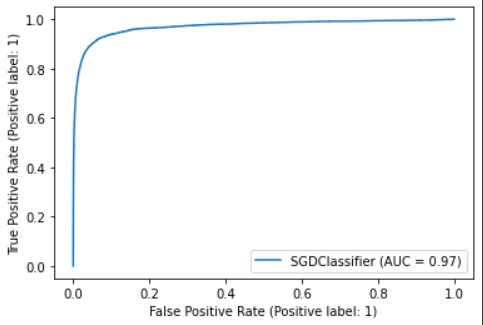

In [78]:
roc_auc_score(y_train_5, y_train_scores) # AUC(면적) Score가 클수록 좋은 모델

0.9604938554008616

### 다중분류

#### SVM Classifier

In [79]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_scores = cross_val_score(svm_clf, X_train[:1000], y_train[:1000], cv=3)

In [80]:
svm_scores

array([0.89520958, 0.9009009 , 0.88288288])

#### SGD Classifier

In [81]:
# 특성 스케일링 적용 전
sgd_clf = SGDClassifier(random_state=42)
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3)
sgd_scores


array([0.87365, 0.85835, 0.8689 ])

In [82]:
# 특성 스케일링 적용 후
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

In [83]:
sgd_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3)
sgd_scores # 교차 검증을 통한 각 폴드(3)별 정확도(accuracy)

array([0.8983, 0.891 , 0.9018])

In [84]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
y_train_pred.shape # 각 폴드별 예측 결과 (60000개의 결과)

(60000,)

In [85]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

### 다중 레이블 분류

In [87]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)   # True or False
y_train_odd = (y_train % 2 == 1)  # Odd or Even
y_multilabel = np.c_[y_train_large, y_train_odd]

In [88]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [89]:
knn_clf.predict([some_digit])  # '5' image에 대한 예측: [False, True]  -> 7보다 크지는 않지만 홀수

array([[False,  True]])

In [90]:
# 교차 검증으로 평가
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

### 다중 출력 분류

In [91]:
# for train data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

# for test data
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# 깨끗한 원본 데이터를 정답 데이터로 만들기
y_train_mod = X_train
y_test_mod = X_test

In [92]:
# 훈련
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [93]:
# 예측
clean_digit = knn_clf.predict([X_test_mod[0]])

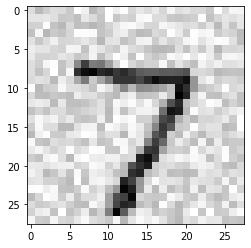

In [97]:
# 시각화
# 노이즈가 들어간 특성 데이터
plt.imshow(X_test_mod[0].reshape(28, 28), cmap='binary')

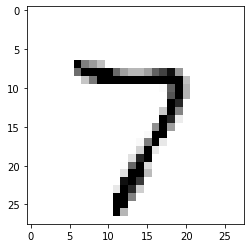

In [98]:
plt.imshow(clean_digit.reshape(28, 28), cmap='binary')